In [1]:
## Assignment 2.1

In [2]:
# Python version: 3.11.4

# create a virtual environment
# vscode: Search bar -> Python: Select Interpreter -> .venv
# terminal: python -m venv /path/to/new/virtual/environment

# activate virtual environment:
# source .venv/bin/activate

# install requirements.txt file in virtual environment:
# pip install -r requirements.txt

# check installed packages:
# pip freeze

Introduction to YALMIP
In these exercises we learn how to formulate different classes of optimization problems such that they can be parsed by YALMIP. This live script makes reference to the Exercise 1 in the handout.
Run the sections one by one by clicking into the respective code window and hitting "Run Section". Sentences highlighted in bold give instructions on how to complete the given code. Code lines like this need to be completed by you:

In [3]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)

plt.rcParams['text.usetex'] = True
print("Installed solvers = ",cp.installed_solvers())

Installed solvers =  ['CLARABEL', 'ECOS', 'ECOS_BB', 'MOSEK', 'OSQP', 'SCIPY', 'SCS']


                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Feb 19 10:44:34 AM: Your problem has 2 variables, 4 constraints, and 0 parameters.
(CVXPY) Feb 19 10:44:34 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Feb 19 10:44:34 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 19 10:44:34 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Feb 19 10:44:34 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Feb 19 10:44:34 AM: Compiling problem (target solver=MOSEK).
(CVX

c:\Users\tychob\Projects\4DM20-engineering-optimization\ComputerAssignment2_python\.venv\Lib\site-packages\mosek\__init__.py:18617: UserWarning: Argument sub in putvarboundlist: Incorrect array format causing data to be copied
  warnings.warn("Argument sub in putvarboundlist: Incorrect array format causing data to be copied");
c:\Users\tychob\Projects\4DM20-engineering-optimization\ComputerAssignment2_python\.venv\Lib\site-packages\mosek\__init__.py:18925: UserWarning: Argument subj in putclist: Incorrect array format causing data to be copied
  warnings.warn("Argument subj in putclist: Incorrect array format causing data to be copied");
c:\Users\tychob\Projects\4DM20-engineering-optimization\ComputerAssignment2_python\.venv\Lib\site-packages\mosek\__init__.py:18349: UserWarning: Argument sub in putconboundlist: Incorrect array format causing data to be copied
  warnings.warn("Argument sub in putconboundlist: Incorrect array format causing data to be copied");


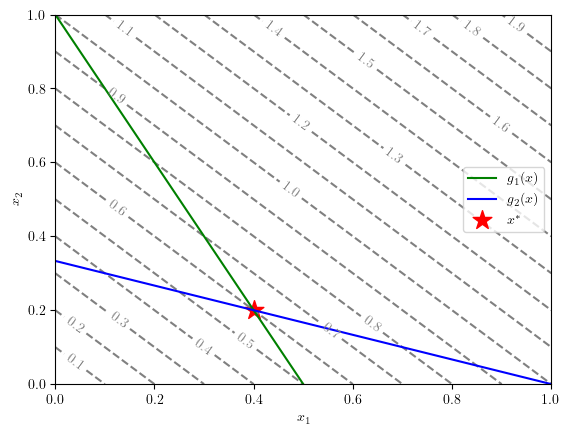

In [4]:
# I. Linear Programming
# Clean up
plt.close('all')

# Problem 1
x1 = cp.Variable()
x2 = cp.Variable()

# Define constraints
constraints = [
    2 * x1 + x2 >= 1,
    x1 + 3 * x2 >= 1,
    x1 >= 0,
    x2 >= 0
    ]

# Define objective
##### Complete code here #####
objective = cp.Minimize( x1 + x2 );
##########

problem = cp.Problem(objective, constraints)
problem.solve(verbose=True)

print("\n x1 = ",x1.value,"x2 = ",x2.value)

# Plot
x1_values = np.linspace(0, 1, 100)
x2_values = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(x1_values, x2_values)
Z = X1 + X2

plt.figure()
fx=plt.contour(X1, X2, Z, levels=np.arange(0, 2.1, 0.1), linestyles='dashed', colors='grey')
plt.clabel(fx, inline=1, fontsize=10) #Places values of f at the lines
plt.plot(x1_values, 1 - 2 * x1_values, label='$g_1(x)$', color='green')
plt.plot(x1_values, (1 - x1_values) / 3, label='$g_2(x)$', color='blue')
plt.scatter(x1.value, x2.value, color='red', marker='*', s=200, label='$x^*$')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Feb 19 10:44:56 AM: Your problem has 2 variables, 3 constraints, and 0 parameters.
(CVXPY) Feb 19 10:44:56 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Feb 19 10:44:56 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 19 10:44:56 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Feb 19 10:44:56 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Feb 19 10:44:56 AM: Compiling problem (target solver=OSQP).
(CVXP

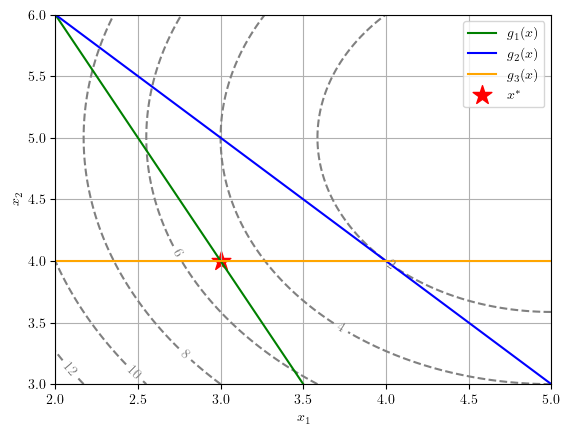

In [5]:
# II. Quadratic Programming

# Clean up
plt.close('all')

# Problem 2
x1 = cp.Variable()
x2 = cp.Variable()

# Define constraints
constraints = [
    2 * x1 + x2 <= 10,
    x1 + x2  <= 8,
    x1 <= 4,
    ]

# Define objective
##### Complete code here #####
objective = cp.Minimize( (x1 - 5)**2 + (x2 - 5)**2 );
##########

problem = cp.Problem(objective, constraints)
problem.solve(verbose=True)

# Plot
x1_values = np.linspace(2, 5, 100)
x2_values = np.linspace(3, 6, 100)
X1, X2 = np.meshgrid(x1_values, x2_values)
Z = (X1 - 5)**2 + (X2 - 5)**2

plt.figure()
fx=plt.contour(X1, X2, Z, levels=np.arange(0, 30, 2), linestyles='dashed', colors='grey')
plt.clabel(fx, inline=1, fontsize=10) #Places values of f at the lines
plt.plot(x1_values, 10 - 2 * x1_values, color='green', label='$g_1(x)$')
plt.plot(x1_values, 8 - x1_values, color='blue', label='$g_2(x)$')
plt.plot(x1_values, 4 + 0 * x1_values, color='orange',label='$g_3(x)$')
plt.scatter(x1.value, x2.value, color='red', marker='*', s=200, label='$x^*$')
plt.grid(True)
plt.xlim([2, 5])
plt.ylim([3, 6])
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Feb 19 10:53:57 AM: Your problem has 4 variables, 5 constraints, and 0 parameters.
(CVXPY) Feb 19 10:53:57 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Feb 19 10:53:57 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 19 10:53:57 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Feb 19 10:53:57 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Feb 19 10:53:57 AM: Compiling problem (target solver=MOSEK).
(CVX

c:\Users\tychob\Projects\4DM20-engineering-optimization\ComputerAssignment2_python\.venv\Lib\site-packages\mosek\__init__.py:18617: UserWarning: Argument sub in putvarboundlist: Incorrect array format causing data to be copied
  warnings.warn("Argument sub in putvarboundlist: Incorrect array format causing data to be copied");
c:\Users\tychob\Projects\4DM20-engineering-optimization\ComputerAssignment2_python\.venv\Lib\site-packages\mosek\__init__.py:18925: UserWarning: Argument subj in putclist: Incorrect array format causing data to be copied
  warnings.warn("Argument subj in putclist: Incorrect array format causing data to be copied");
c:\Users\tychob\Projects\4DM20-engineering-optimization\ComputerAssignment2_python\.venv\Lib\site-packages\mosek\__init__.py:18349: UserWarning: Argument sub in putconboundlist: Incorrect array format causing data to be copied
  warnings.warn("Argument sub in putconboundlist: Incorrect array format causing data to be copied");


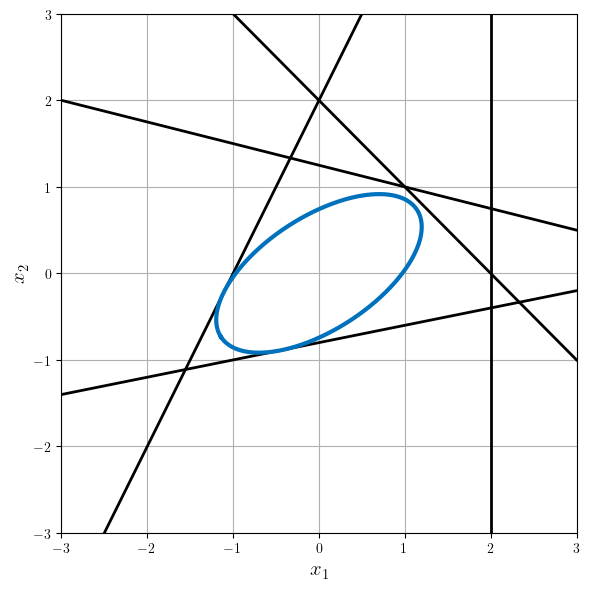

In [11]:
# III. Semidefinite Programming

# Define constraints of the polytope in the form Ax + b <= 0
##### Complete code here #####
A = np.array( [[-2, 1], [1, 4], [2, 2], [1, 0], [-2, 10]] )
b = np.array( [-2, -5, -4, -2, 8] )
##########

# Define variables
P = cp.Variable((2, 2), PSD=True)

# Define constraints
##### Complete code here #####
constraints = []
for i in range(A.shape[0]):
    constraints.append( cp.quad_form( A[i, :], P ) - b[i]**2 <= 0 )
##########

# Define objective
##### Complete code here #####
objective = cp.Minimize( -cp.log_det(P) );
##########

# Solve SDP
prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.MOSEK, verbose=True)

# Print solution
print("Optimal value (logdet(P)): ", prob.value)
P_sol = P.value;
print("Optimal solution (P): \n", P_sol)

## Plot the solution
plt.figure(figsize=(6, 6))
x_points = np.linspace(-3, 3, 100)
for i in range(A.shape[0]):
    if np.abs(A[i, 1]) > np.finfo(float).eps:
        plt.plot(x_points, -(A[i, 0] / A[i, 1]) * x_points - b[i] / A[i, 1], '-k', linewidth=2)
    else:
        plt.plot(-b[i] / A[i, 0] * np.array([1, 1]), np.array([-3, 3]), '-k', linewidth=2)

theta = np.linspace(0, 2 * np.pi, 1000)
y = np.vstack((np.cos(theta), np.sin(theta)))
eigenvalues, eigenvector = np.linalg.eig(np.linalg.inv(P_sol))
T = eigenvector @ np.linalg.inv(np.sqrt(np.diag(eigenvalues)))
x = T @ y

plt.plot(x[0], x[1], linewidth=3, color=[0, 0.4470, 0.7410])
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
# IV. Conic Programming

# Define matrices and vectors
A = np.array([[3.0, -2.0], [-2.0, 1.0]])

# First optimization problem
x = cp.Variable((2, 1))

# Objective and Constraints
##### Complete code here #####
constraints = [cp.quad_form(x, A) <= 0, x >= 0]
objective = cp.Minimize(cp.sum_squares(x - c))
##########

# Solve the first optimization problem
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.MOSEK, verbose=True)

print("Optimal value of x for the first problem:", x.value)


                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Feb 19 11:04:49 AM: Your problem has 2 variables, 3 constraints, and 0 parameters.
(CVXPY) Feb 19 11:04:49 AM: It is compliant with the following grammars: 
(CVXPY) Feb 19 11:04:49 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 19 11:04:49 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Feb 19 11:04:49 AM: Your problem is compiled with the CPP canonicalization backend.


DCPError: Problem does not follow DCP rules. Specifically:
The following constraints are not DCP:
QuadForm(var752, [[3.00 -2.00]
 [-2.00 1.00]]) <= 0.0 , because the following subexpressions are not:
|--  QuadForm(var752, [[3.00 -2.00]
 [-2.00 1.00]])

                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Feb 19 11:04:51 AM: Your problem has 2 variables, 1 constraints, and 0 parameters.
(CVXPY) Feb 19 11:04:51 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Feb 19 11:04:51 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 19 11:04:51 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Feb 19 11:04:51 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Feb 19 11:04:51 AM: Compiling problem (target solver=MOSEK).
(CVX

C:\Users\tychob\AppData\Local\Temp\ipykernel_23712\4261377330.py:49: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x1vector, x2vector, x2vector[:, np.newaxis] ** 2 + (x1vector - 3)[np.newaxis, :] ** 2, levels=range(0, 31, 2), linestyles='--', colors='b', alpha=0.5, label='$f(\\mathbf{x})$')


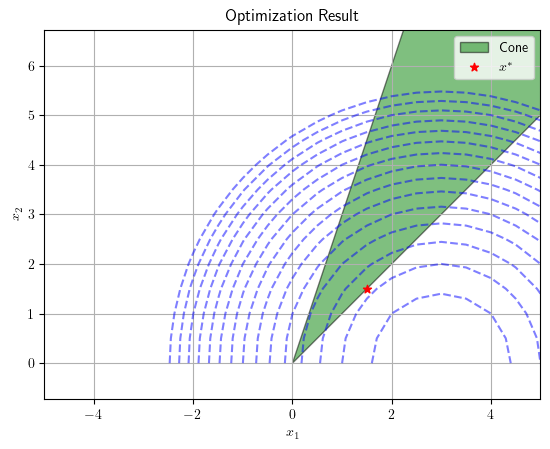

In [31]:
# IV. Conic Programming

# Define vectors for second optimization problem
##### Complete code here #####
c = np.array([[3.0], [0.0]])
a = np.array([[3], [-2]])
b = np.array([[0], [1]])
##########

# Second optimization problem
x = cp.Variable((2, 1))

# Objective and Constraints
##### Complete code here #####
constraints = [cp.SOC((b.T @ x)[0,0], a.T @ x)]
objective = cp.Minimize( cp.sum_squares(x - c) )
##########

# Solve the second optimization problem
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.MOSEK, verbose=True)

print("Optimal value of x for the second problem:", x.value)

# Plotting
x1vector = np.arange(-5, 6, 0.5)
x2vector = np.arange(0, 6, 0.5)

def conePlot2d(a, b):
    coneplot = False
    if np.sign(a[0]) * np.sign(a[1]) == 1:
        g1vector = (b[0] - np.abs(a[0])) / (np.abs(a[1]) - b[1]) * x1vector
        g2vector = (b[0] - np.abs(a[0])) / (np.abs(a[1]) - b[1]) * x1vector
        coneplot = True
    elif np.sign(a[0]) * np.sign(a[1]) == -1:
        g1vector = (b[0] + np.abs(a[0])) / (np.abs(a[1]) - b[1]) * x1vector
        g2vector = (-b[0] + np.abs(a[0])) / (np.abs(a[1]) + b[1]) * x1vector
        coneplot = True

    if coneplot:
        x1Top = [x1vector[np.argmax(g1vector)], x1vector[np.argmax(g2vector)]]
        x2Top = [np.max(g1vector), np.max(g2vector)]
        
        plt.fill([0, np.min(x1Top), np.max(x1Top), 0], [0, np.min(x2Top), np.max(x2Top), 0], 'g', alpha=0.5, edgecolor='k', label='Cone')
        plt.xlim([-5, 5])
        plt.ylim([0, 5])

plt.figure()
plt.contour(x1vector, x2vector, x2vector[:, np.newaxis] ** 2 + (x1vector - 3)[np.newaxis, :] ** 2, levels=range(0, 31, 2), linestyles='--', colors='b', alpha=0.5, label='$f(\\mathbf{x})$')
conePlot2d(a, b)
plt.scatter(x.value[0], x.value[1], color='r', marker='*', label='$x^*$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Optimization Result')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.xlim([-5, 5])
plt.ylim([0, 6])
plt.show()

